In [1]:
#Import Dependencies
import warnings
warnings.simplefilter('ignore')

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib

In [3]:
df = pd.read_csv("Source/facebook_mock.csv")
df

,Page.total.likes,Type,Category,Post.Month,Post.Weekday,Post.Hour,Paid,LPost.Tot.Reach,LPost.Tot.Impressions,Lifetime.Engaged.Users,LPost.Consumers,LPost.Consumptions,LPost.Liked.Page.Impressions,LPost.Liked.Page.Reach,LPeople.Post.Like...Engange,comment,like,share,Total.Interactions,Clus_km
0,139441,Photo,2,12,4,3,0,2752,5091,178,109,159,3078,1640,119,4,79,17,100,0
1,139441,Status,2,12,3,10,0,10460,19057,1457,1361,1674,11710,6112,1108,5,130,29,164,0
2,139441,Photo,3,12,3,3,0,2413,4373,177,113,154,2812,1503,132,0,66,14,80,0
3,139441,Photo,2,12,2,10,1,50128,87991,2211,790,1119,61027,32048,1386,58,1572,147,1777,1
4,139441,Photo,2,12,2,3,0,7244,13594,671,410,580,6228,3200,396,19,325,49,393,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,141457,Photo,2,5,3,6,0,35677,71217,3160,54,5231,28210,31073,2158,50,889,79,1018,1
712,112566,Photo,3,12,3,8,1,45025,50479,1043,3335,3224,32796,20391,260,19,636,79,734,1
713,124315,Photo,2,9,4,6,1,18994,99683,758,1633,5178,66787,28780,1759,49,690,68,807,1
714,114475,Photo,1,3,6,4,1,40281,70006,2374,3505,745,17250,13776,2270,25,194,56,275,1


In [4]:
list(df.columns)

['Page.total.likes',
 'Type',
 'Category',
 'Post.Month',
 'Post.Weekday',
 'Post.Hour',
 'Paid',
 'LPost.Tot.Reach',
 'LPost.Tot.Impressions',
 'Lifetime.Engaged.Users',
 'LPost.Consumers',
 'LPost.Consumptions',
 'LPost.Liked.Page.Impressions',
 'LPost.Liked.Page.Reach',
 'LPeople.Post.Like...Engange',
 'comment',
 'like',
 'share',
 'Total.Interactions',
 'Clus_km']

In [5]:
#Quitamos la columna con el objetivo.
X = df[['Page.total.likes','Type','Category', 'Post.Month', 'Post.Weekday', 'Post.Hour', 'Paid',
        'LPost.Tot.Reach', 'LPost.Tot.Impressions', 'Lifetime.Engaged.Users', 'LPost.Consumers', 'LPost.Consumptions',
         'LPost.Liked.Page.Impressions','LPost.Liked.Page.Reach','LPeople.Post.Like...Engange', 'comment', 'like',
         'share']].values
X[0:5]

array([[139441, 'Photo', 2, 12, 4, 3, 0, 2752, 5091, 178, 109, 159, 3078,
        1640, 119, 4, 79, 17],
       [139441, 'Status', 2, 12, 3, 10, 0, 10460, 19057, 1457, 1361,
        1674, 11710, 6112, 1108, 5, 130, 29],
       [139441, 'Photo', 3, 12, 3, 3, 0, 2413, 4373, 177, 113, 154, 2812,
        1503, 132, 0, 66, 14],
       [139441, 'Photo', 2, 12, 2, 10, 1, 50128, 87991, 2211, 790, 1119,
        61027, 32048, 1386, 58, 1572, 147],
       [139441, 'Photo', 2, 12, 2, 3, 0, 7244, 13594, 671, 410, 580,
        6228, 3200, 396, 19, 325, 49]], dtype=object)

In [6]:
#Reescribamos la columna Type pues tupo character
from sklearn import preprocessing
le_type = preprocessing.LabelEncoder()
le_type.fit(['Photo','Status', 'Link','Video'])
X[:,1] = le_type.transform(X[:,1]) 

In [7]:
X[0:5]

array([[139441, 1, 2, 12, 4, 3, 0, 2752, 5091, 178, 109, 159, 3078, 1640,
        119, 4, 79, 17],
       [139441, 2, 2, 12, 3, 10, 0, 10460, 19057, 1457, 1361, 1674,
        11710, 6112, 1108, 5, 130, 29],
       [139441, 1, 3, 12, 3, 3, 0, 2413, 4373, 177, 113, 154, 2812, 1503,
        132, 0, 66, 14],
       [139441, 1, 2, 12, 2, 10, 1, 50128, 87991, 2211, 790, 1119, 61027,
        32048, 1386, 58, 1572, 147],
       [139441, 1, 2, 12, 2, 3, 0, 7244, 13594, 671, 410, 580, 6228,
        3200, 396, 19, 325, 49]], dtype=object)

In [8]:
#Ahora extraemos la variable objetivo
y = df["Clus_km"]
y[0:5]

0    0
1    0
2    0
3    1
4    1
Name: Clus_km, dtype: int64

# Pre-processing and features selection

In [9]:
# Assign the data to X and y

X = df[['Page.total.likes','Type', 'Category', 'Post.Month', 'Post.Weekday', 'Post.Hour', 'Paid', 'LPost.Tot.Reach',
         'LPost.Tot.Impressions',  'Lifetime.Engaged.Users', 'LPost.Consumers', 'LPost.Consumptions', 'LPost.Liked.Page.Impressions',
         'LPost.Liked.Page.Reach', 'LPeople.Post.Like...Engange', 'comment', 'like', 'share', 'Total.Interactions', ]]
y = df['Clus_km'].values.reshape(-1, 1)
print(X.shape, y.shape)

(716, 19) (716, 1)


In [10]:
#Ahora extraemos la variable objetivo
y = df["Clus_km"]
y[0:5]

0    0
1    0
2    0
3    1
4    1
Name: Clus_km, dtype: int64

# Train and Test split

In [11]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [42]:
X_train.head()

,Page.total.likes,Type,Category,Post.Month,Post.Weekday,Post.Hour,Paid,LPost.Tot.Reach,LPost.Tot.Impressions,Lifetime.Engaged.Users,LPost.Consumers,LPost.Consumptions,LPost.Liked.Page.Impressions,LPost.Liked.Page.Reach,LPeople.Post.Like...Engange,comment,like,share,Total.Interactions
649,138263,Photo,3,5,2,5,0,24813,28265,2607,298,2409,78080,13940,1158,29,543,70,642
362,113028,Photo,2,4,7,3,1,5582,9903,708,620,923,6315,3422,557,2,163,35,200
625,107218,Photo,3,5,6,6,1,73635,193136,2514,3050,442,37209,22959,1938,32,461,91,584
248,129600,Photo,3,7,5,3,0,54256,82011,1620,963,1419,42128,24224,977,10,755,58,823
346,116435,Photo,3,5,3,7,0,18552,25542,1005,676,1021,15973,10584,676,4,400,25,429


In [43]:
y_train

649    1
362    0
625    1
248    1
346    0
      ..
71     1
106    0
270    0
435    0
102    0
Name: Clus_km, Length: 537, dtype: int64

In [13]:
X_trainset.shape

(501, 19)

In [14]:
y_trainset.shape

(501,)

In [15]:
X_testset.shape

(215, 19)

In [16]:
y_testset.shape

(215,)

# Build the model

In [17]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
df = LinearRegression()
### END SOLUTION

In [21]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
df.fit(X_trainset, y_trainset)
training_score = df.score(X_trainset, y_trainset)
testing_score = df.score(X_testset, y_testset)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

ValueError: could not convert string to float: 'Photo'

Text(0.5, 1.0, 'Residual Plot')

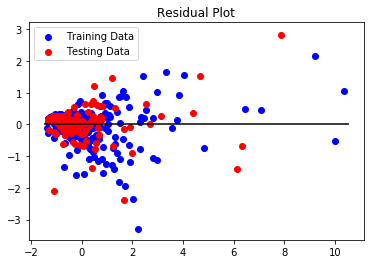

In [10]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(linRmodel.predict(X_train), linRmodel.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(linRmodel.predict(X_test), linRmodel.predict(X_test) - y_test, c="red", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [11]:
import joblib
filename = ('models/FBMLinearRegression_model.sav')
joblib.dump(linRmodel,filename)

['models/FBMLinearRegression_model.sav']